In [1]:
import skmob
from skmob.preprocessing import detection, clustering, compression
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from skmob.tessellation import tilers
from shapely.geometry import Point, Polygon
import h3
#import shapely
import shapely.geometry
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import contextily as ctx
from shapely import wkt

In [2]:
df = pd.read_csv('Taxi_trips.csv')
df.drop('OID_', axis=1, inplace=True)
df.drop('Field1', axis=1, inplace=True)
df.head()

,latitude,Longitude,occupancy,time,user,trip
0,37.75153,-122.39447,0,5/17/2008 14:12:10,new_abboip,1
1,37.75149,-122.39447,0,5/17/2008 14:13:34,new_abboip,1
2,37.75149,-122.39447,0,5/17/2008 14:14:34,new_abboip,1
3,37.75149,-122.39446,0,5/17/2008 14:15:35,new_abboip,1
4,37.75144,-122.39449,0,5/17/2008 14:41:43,new_abboip,1


In [3]:
df.shape

(9886183, 6)

In [4]:
sd = gpd.read_file("Census-tracts.geojson")
dframe = gpd.GeoDataFrame(data = df, crs='epsg:4326', 
                            geometry= gpd.points_from_xy(df.Longitude, df.latitude))

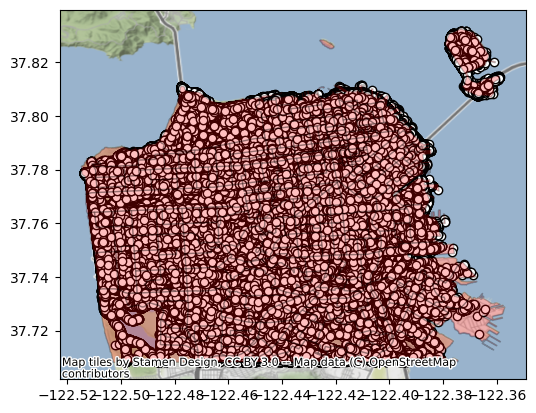

In [5]:
base = dframe.plot(color='white', edgecolor='black')

ax = sd.plot(ax=base, alpha = 0.25, color='red', edgecolor = 'black');

ctx.add_basemap(ax, crs = dframe.crs.to_string(), zoom = 12)


In [6]:
dframe['Time'] = (pd.to_datetime(dframe['time'], format='%m/%d/%Y %H:%M:%S').dt.time)

In [7]:
dframe.to_csv('Trips.csv')